In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import platform

%matplotlib inline

# 日本語フォントの設定
def setup_japanese_font():
    """利用可能な日本語フォントを自動的に設定"""
    system = platform.system()
    
    # 利用可能なフォントを確認
    available_fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
    
    # 優先順位に従ってフォントを設定
    font_candidates = []
    
    if system == 'Darwin':  # macOS
        font_candidates = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Arial Unicode MS']
    elif system == 'Windows':
        font_candidates = ['MS Gothic', 'Yu Gothic', 'Meiryo']
    else:  # Linux
        font_candidates = ['Noto Sans CJK JP', 'IPAexGothic', 'IPAPGothic']
    
    # 利用可能なフォントを探す
    for font in font_candidates:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            print(f"日本語フォントを設定しました: {font}")
            return font
    
    # フォントが見つからない場合の警告
    print("警告: 日本語フォントが見つかりませんでした。日本語が正しく表示されない可能性があります。")
    print("利用可能なフォントの一部:", available_fonts[:10])
    return None

# 日本語フォントを設定
setup_japanese_font()

# マイナス記号の文字化けを防ぐ
plt.rcParams['axes.unicode_minus'] = False

# その他の設定
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 'large'})


日本語フォントを設定しました: Hiragino Sans


# Gamma分布とBeta分布のプロット関数

このノートブックでは、Gamma分布とBeta分布を理解するためのプロット関数を定義します。


## Gamma分布について
- **形状パラメータ（shape, α, k）**: 分布の形状を決定
- **スケールパラメータ（scale, θ）**: 分布のスケールを決定
- 平均 = shape × scale
- 分散 = shape × scale²

## Beta分布について
- **パラメータa（α）**: 形状パラメータ1
- **パラメータb（β）**: 形状パラメータ2
- 定義域: [0, 1]
- 平均 = a / (a + b)

In [2]:
def plot_gamma_distribution(shape, scale, x_max=10, num_points=1000, title=None):
    """
    Gamma分布の確率密度関数をプロットする関数
    
    Parameters:
    -----------
    shape : float
        Gamma分布の形状パラメータ（α, kとも呼ばれる）
    scale : float
        Gamma分布のスケールパラメータ（θとも呼ばれる）
    x_max : float
        プロットするxの最大値（デフォルト: 10）
    num_points : int
        プロットする点の数（デフォルト: 1000）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    """
    # x軸の値を生成
    x = np.linspace(0.01, x_max, num_points)
    
    # Gamma分布の確率密度関数を計算
    # scipy.stats.gammaでは、a=shape, scale=scale
    pdf = stats.gamma.pdf(x, a=shape, scale=scale)
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, pdf, 'b-', linewidth=2, label=f'Gamma({shape}, {scale})')
    ax.fill_between(x, pdf, alpha=0.3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    if title is None:
        ax.set_title(f'Gamma分布: shape={shape}, scale={scale}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    mean = shape * scale
    var = shape * scale ** 2
    print(f"平均: {mean:.4f}")
    print(f"分散: {var:.4f}")
    print(f"標準偏差: {np.sqrt(var):.4f}")


def plot_beta_distribution(a, b, num_points=1000, title=None):
    """
    Beta分布の確率密度関数をプロットする関数
    
    Parameters:
    -----------
    a : float
        Beta分布のパラメータα（形状パラメータ1）
    b : float
        Beta分布のパラメータβ（形状パラメータ2）
    num_points : int
        プロットする点の数（デフォルト: 1000）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    """
    # x軸の値を生成（Beta分布は[0,1]の範囲）
    x = np.linspace(0.001, 0.999, num_points)
    
    # Beta分布の確率密度関数を計算
    pdf = stats.beta.pdf(x, a=a, b=b)
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, pdf, 'r-', linewidth=2, label=f'Beta({a}, {b})')
    ax.fill_between(x, pdf, alpha=0.3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.set_xlim(0, 1)
    if title is None:
        ax.set_title(f'Beta分布: a={a}, b={b}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    mean = a / (a + b)
    var = (a * b) / ((a + b) ** 2 * (a + b + 1))
    print(f"平均: {mean:.4f}")
    print(f"分散: {var:.4f}")
    print(f"標準偏差: {np.sqrt(var):.4f}")

print("プロット関数の定義が完了しました。")


プロット関数の定義が完了しました。


# Gamma分布のプロット例

以下では、様々なパラメータのGamma分布をプロットします。
各セルでパラメータを設定してからプロットします。


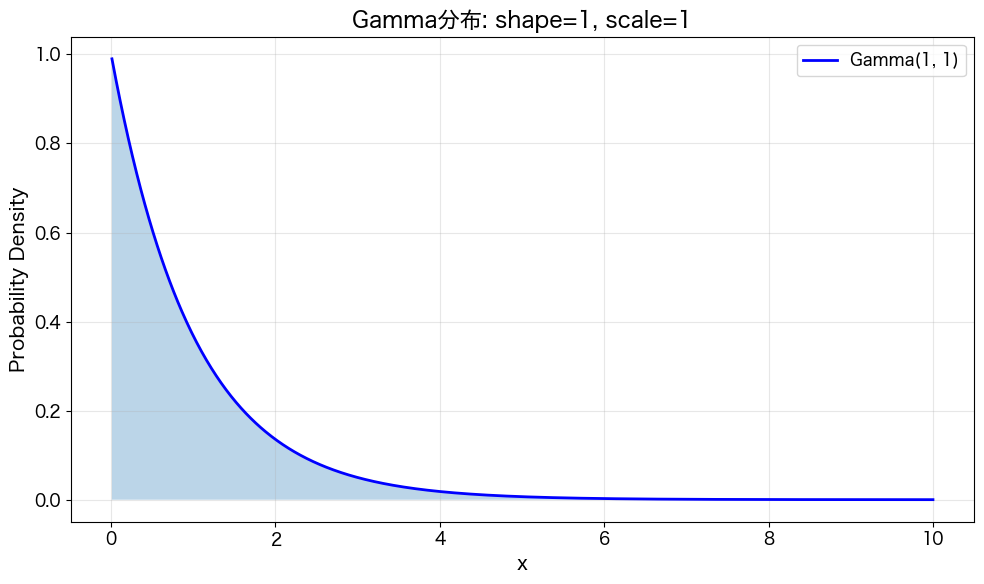

平均: 1.0000
分散: 1.0000
標準偏差: 1.0000


In [18]:
# パラメータ設定
shape = 1
scale = 1

# プロット
# 注意: Gamma(1, 1)は指数分布と等価です
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


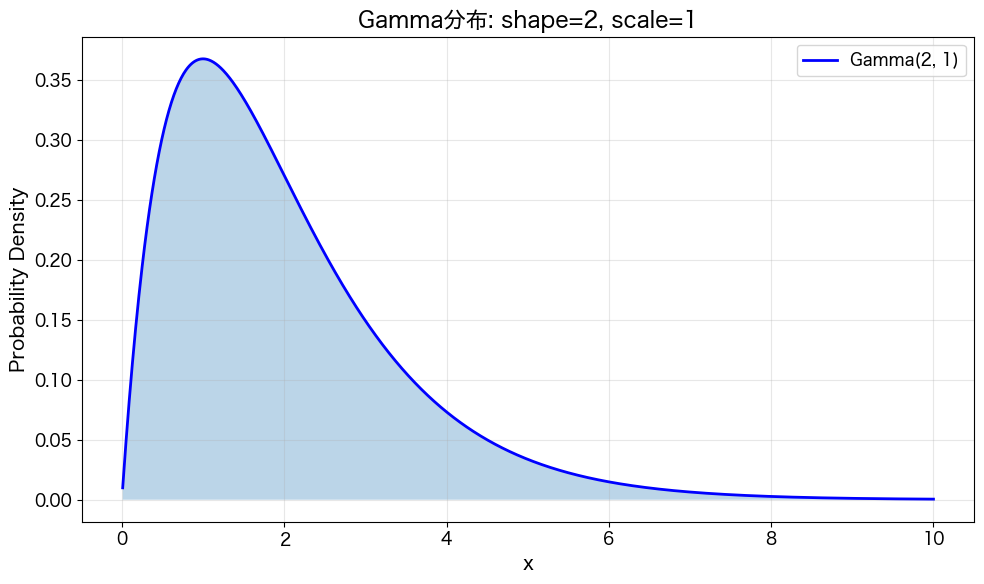

平均: 2.0000
分散: 2.0000
標準偏差: 1.4142


In [19]:
# パラメータ設定
shape = 2
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


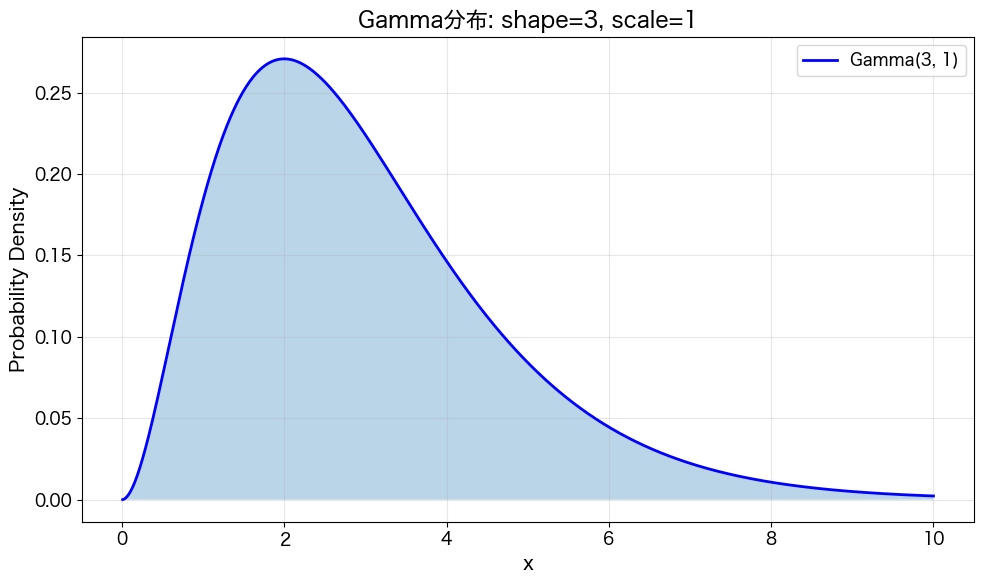

平均: 3.0000
分散: 3.0000
標準偏差: 1.7321


In [20]:
# パラメータ設定
shape = 3
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


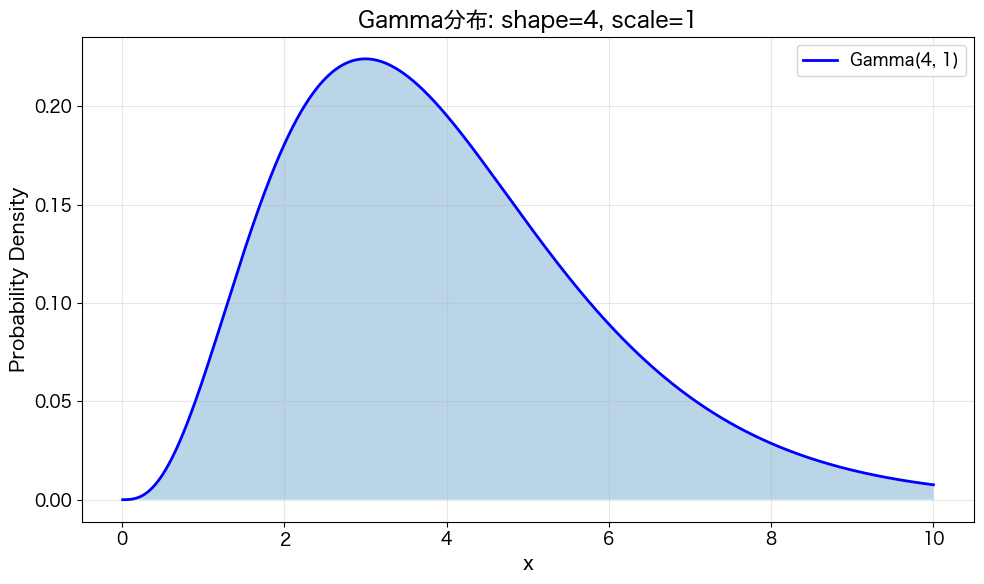

平均: 4.0000
分散: 4.0000
標準偏差: 2.0000


In [8]:
# パラメータ設定
shape = 4
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


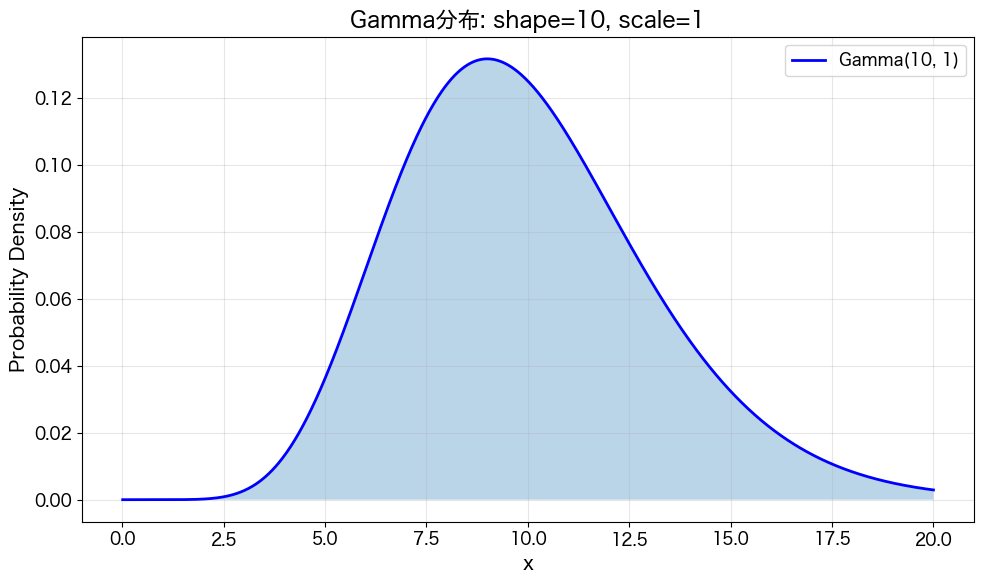

平均: 10.0000
分散: 10.0000
標準偏差: 3.1623


In [10]:
# パラメータ設定
shape = 10
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=20)


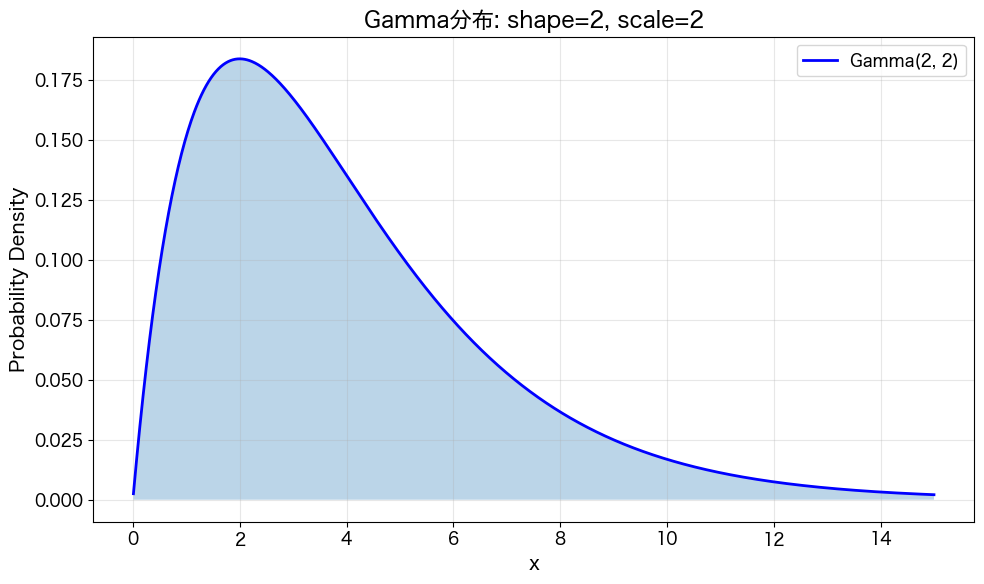

平均: 4.0000
分散: 8.0000
標準偏差: 2.8284


In [9]:
# パラメータ設定
shape = 2
scale = 2

# プロット（スケールパラメータを変更した場合）
plot_gamma_distribution(shape=shape, scale=scale, x_max=15)


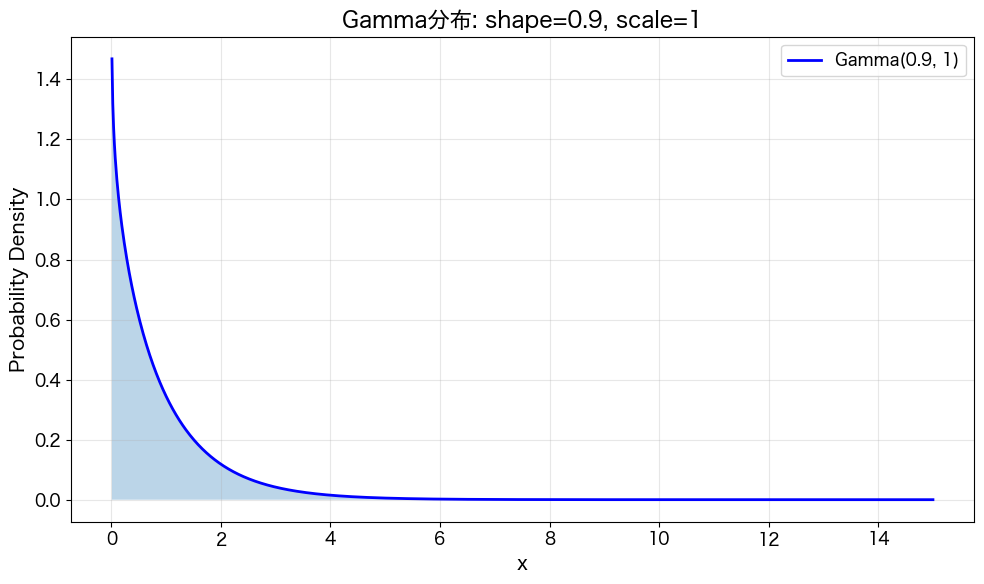

平均: 0.9000
分散: 0.9000
標準偏差: 0.9487


In [11]:
# パラメータ設定
shape = 0.9
scale = 1

# プロット（スケールパラメータを変更した場合）
plot_gamma_distribution(shape=shape, scale=scale, x_max=15)

# Beta分布のプロット例

以下では、様々なパラメータのBeta分布をプロットします。
各セルでパラメータを設定してからプロットします。


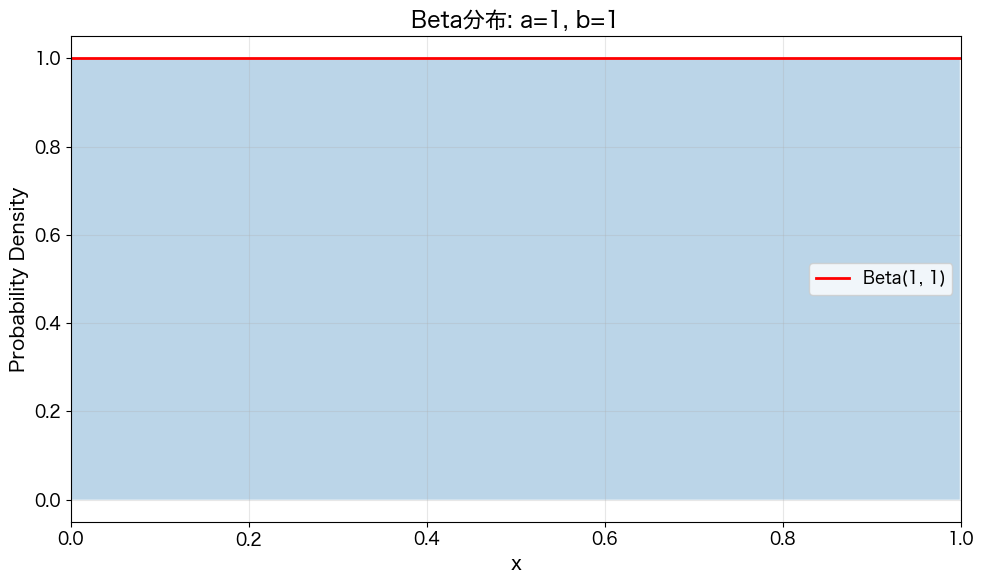

平均: 0.5000
分散: 0.0833
標準偏差: 0.2887


In [22]:
# パラメータ設定
a = 1
b = 1

# プロット
# 注意: Beta(1, 1)は一様分布[0,1]と等価です
plot_beta_distribution(a=a, b=b)


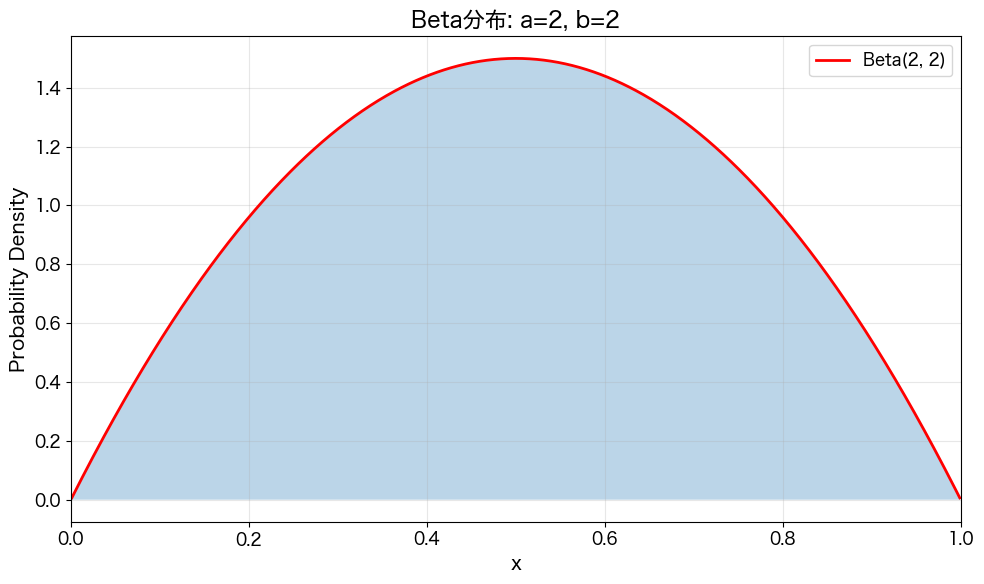

平均: 0.5000
分散: 0.0500
標準偏差: 0.2236


In [23]:
# パラメータ設定
a = 2
b = 2

# プロット
plot_beta_distribution(a=a, b=b)


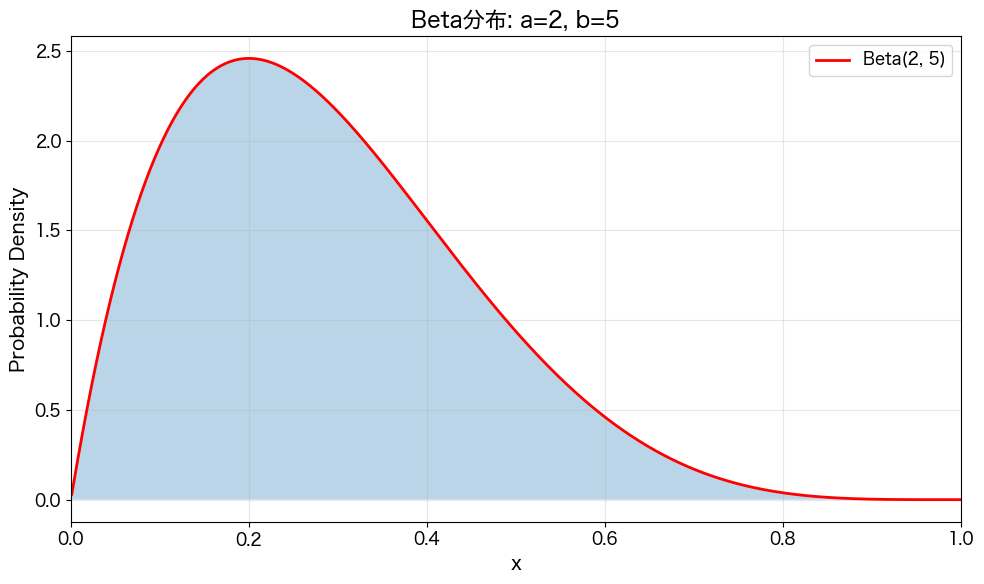

平均: 0.2857
分散: 0.0255
標準偏差: 0.1597


In [24]:
# パラメータ設定
a = 2
b = 5

# プロット（非対称な分布）
plot_beta_distribution(a=a, b=b)


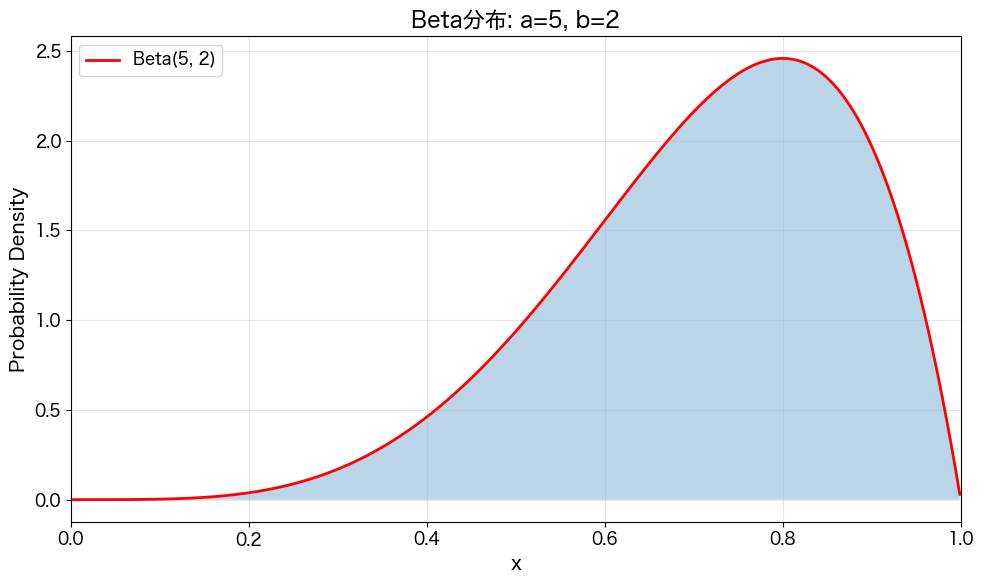

平均: 0.7143
分散: 0.0255
標準偏差: 0.1597


In [25]:
# パラメータ設定
a = 5
b = 2

# プロット（Beta(2,5)の逆、右に偏った分布）
plot_beta_distribution(a=a, b=b)
